In [7]:
import os

os.chdir('./tohost/research1_wavelet_transform_module/wsae-lstm')

# Imports (External)
import sys
sys.path.append('../')
sys.path.append('tohost/research1_wavelet_transform_module/wsae-lstm')

import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import xlsxwriter
from collections import OrderedDict
import copy
 
# Visualization/plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt

# Preprocessing/Scaling/Feature Imports
import pywt
from pywt import wavedec, waverec
from scipy import signal
from statsmodels.robust import mad
from sklearn import preprocessing


# Machine Learning/Deep Learning Imports
import sklearn
import tensorflow as tf
import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import optimizers
from keras import regularizers

# Internal Imports
from src.utils import pickle_load,pickle_save
from src.models.wavelet import waveletSmooth

In [10]:
import sys
import os
print(sys.path)
print(os.listdir())
print(os.getcwd())

['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/pygpu-0.7.6-py3.6-linux-x86_64.egg', '/usr/local/lib/python3.6/dist-packages/Mako-1.1.3-py3.6.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', 'tohost/research1_wavelet_transform_module/wsae-lstm', 'tohost/research1_wavelet_transform_module/wsae-lstm', '../', '../..', '../', 'tohost/research1_wavelet_transform_module/wsae-lstm']
['src', 'notebooks', 'references', 'README.md', 'LICENSE', 'environment.yml', 'data', '.gitignore', 'reports', 'docs', 'subrepos', 'requirements.txt', '.git']
/tohost/research1_wavelet_transform_module/wsae-lstm


In [11]:
dict_dataframes_index=pickle_load(path_filename="./data/interim/cdii_tvt_split.pickle")
ddi_scaled=pickle_load(path_filename="./data/interim/cdii_tvt_split_scaled.pickle")
ddi_denoised=pickle_load(path_filename="./data/interim/cdii_tvt_split_scaled_denoised.pickle")

In [12]:
dict_dataframes_index.keys()

dict_keys(['csi300 index data', 'nifty 50 index data', 'hangseng index data', 'nikkei 225 index data', 's&p500 index data', 'djia index data'])

In [15]:
#dict_dataframes_index

{'csi300 index data': {1: {1:                open     high      low    close     volume  us dollar index  \
   date                                                                         
   2008-07-01  2799.20  2809.38  2690.18  2698.35  288515.85            72.34   
   2008-07-02  2702.63  2745.94  2670.06  2699.60  279163.65            71.99   
   2008-07-03  2654.48  2807.68  2617.26  2760.61  456603.05            72.73   
   2008-07-04  2751.21  2783.85  2716.02  2741.85  379050.10            72.71   
   2008-07-07  2747.61  2890.99  2747.61  2882.76  527320.24            72.71   
   ...             ...      ...      ...      ...        ...              ...   
   2010-06-25  2744.12  2759.45  2715.66  2736.29  306717.82            85.35   
   2010-06-28  2734.51  2751.46  2710.09  2716.78  277100.44            85.69   
   2010-06-29  2717.47  2724.23  2591.69  2592.02  487585.52            86.13   
   2010-06-30  2572.91  2575.82  2546.84  2563.07  356987.94            86.05   
 

In [16]:
# Train
dict_dataframes_index['csi300 index data'][1][1].head(2)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
date,,,,,,,,,,,,,,,,,,,
2008-07-01,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
2008-07-02,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08


In [17]:
# Test
dict_dataframes_index['csi300 index data'][1][3].head(2)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
date,,,,,,,,,,,,,,,,,,,
2010-10-08,2965.65,3055.84,2963.24,3044.23,999947.20,77.20,1.7325,14.071181,187.594016,120.262,2912.040962,2913.539251,2898.0211,194.405,2928.1110,111.679,3.808250,0.043045,1.079573e+08
2010-10-11,3069.19,3154.20,3069.19,3132.90,1587349.04,77.47,1.6683,29.910782,243.000652,109.971,2920.543577,2934.430275,2919.9912,275.419,2973.6842,170.576,5.758191,0.087812,2.313821e+08


In [18]:
# Validate
dict_dataframes_index['csi300 index data'][1][2].head(2)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
date,,,,,,,,,,,,,,,,,,,
2010-07-01,2557.92,2574.10,2524.57,2526.07,328576.46,84.55,2.2492,-68.405561,-199.061153,49.525,2742.562654,2713.585325,2691.0766,-232.424,2626.8448,-223.952,-8.143641,-0.063088,-9.298846e+07
2010-07-02,2523.04,2542.12,2462.20,2534.11,449141.00,84.37,2.1942,-74.447502,-160.377588,79.920,2729.510192,2696.491961,2674.8705,-223.393,2586.4084,-224.761,-8.146862,-0.088669,-8.628590e+07


In [19]:
# Multi-level wavelet transform

#https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html
#https://pywavelets.readthedocs.io/en/latest/ref/thresholding-functions.html
#https://pywavelets.readthedocs.io/en/latest/ref/signal-extension-modes.html#ref-modes

def waveletSmooth( x, wavelet="haar", level=2, declevel=2):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode='periodization',level=declevel,axis=0 )
    # calculate a threshold
    sigma = mad(coeff[-level])
    #print("sigma: ",sigma)
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    #print("uthresh: ", uthresh)
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="hard" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode='periodization',axis=0 )
    return y

In [21]:

scaler = preprocessing.RobustScaler()

X_train = dict_dataframes_index['csi300 index data'][1][1]
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=list(X_train.columns))

# X_val = dict_dataframes_index['csi300 index data'][1][2]
# X_val_scaled = scaler.transform(X_val)
# X_val_scaled_df = pd.DataFrame(X_val_scaled,columns=list(X_val.columns))

# X_test = dict_dataframes_index['csi300 index data'][1][3]
# X_test_scaled = scaler.transform(X_test)
# X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=list(X_test.columns))

# Wavelet Denoise
X_train_scaled_denoised_df = pd.DataFrame(waveletSmooth(X_train_scaled))      
# X_val_scaled_denoised_df = pd.DataFrame(waveletSmooth(X_val_scaled),columns=list(X_val_scaled.columns))  
# X_test_scaled_denoised_df = pd.DataFrame(waveletSmooth(X_test_scaled),columns=list(X_test_scaled.columns))     

In [22]:
print(dict_dataframes_index['csi300 index data'][1][1].columns)
print(len(dict_dataframes_index['csi300 index data'][1][1]))
print(len(dict_dataframes_index['csi300 index data'][1][1].columns))
print(dict_dataframes_index['csi300 index data'][1][1].shape[1])

Index(['open', 'high', 'low', 'close', 'volume', 'us dollar index', 'shibor',
       'macd', 'cci', 'atr', 'boll', 'ema20', 'ma10', 'mtm6', 'ma5', 'mtm12',
       'roc', 'smi', 'wvad'],
      dtype='object')
489
19
19


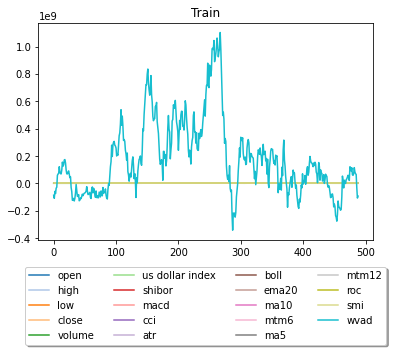

In [23]:
# Train
# plt.plot(X_train.values);

f, ax = plt.subplots()
plt.title("Train")
colormap = plt.cm.tab20
colors = [colormap(i) for i in np.linspace(0, 1,20)]
ax.set_prop_cycle('color', colors)
ax.plot(X_train.values)
plt.legend(X_train.columns,loc='upper center',bbox_to_anchor=(0.5, -0.1),
           ncol=4,fancybox=True,shadow=True)
plt.show()

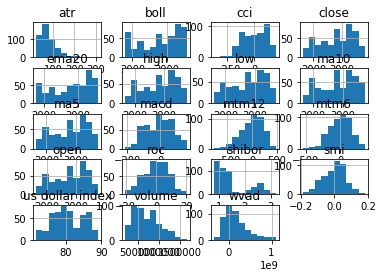

In [112]:
X_train.hist();

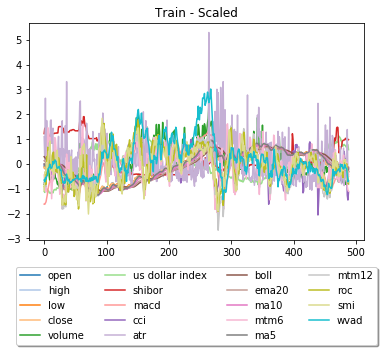

In [113]:
# Train, Scaled
# plt.plot(X_train_scaled_df.values);
f, ax = plt.subplots()
plt.title("Train - Scaled")
colormap = plt.cm.tab20
colors = [colormap(i) for i in np.linspace(0, 1,20)]
ax.set_prop_cycle('color', colors)
ax.plot(X_train_scaled_df.values)
plt.legend(X_train.columns,loc='upper center',bbox_to_anchor=(0.5, -0.1),
           ncol=4,fancybox=True,shadow=True)
plt.show()

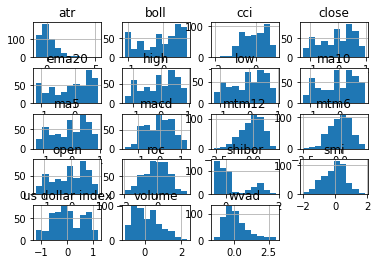

In [114]:
X_train_scaled_df.hist();

In [115]:
# Train, Scaled & Denoised Dataframe (Level parameter/Axis examination)
X_train_scaled_denoised_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.128562,-0.111557,-0.142953,-0.139088,-0.681506,-1.088820,1.198424,-1.588195,-0.694604,0.965162,0.239430,0.086047,-0.046230,-0.826665,-0.067377,-0.795497,-0.726688,-0.503996,-0.640189
1,-0.128562,-0.111557,-0.142953,-0.139088,-0.681506,-1.088820,1.416969,-1.588195,-0.694604,0.965162,0.239430,0.086047,-0.046230,-0.826665,-0.067377,-0.795497,-0.726688,-0.503996,-0.640189
2,-0.128562,-0.111557,-0.142953,-0.139088,-0.681506,-1.088820,1.307696,-1.588195,-0.694604,0.965162,0.239430,0.086047,-0.046230,-0.826665,-0.067377,-0.795497,-0.726688,-0.503996,-0.640189
3,-0.128562,-0.111557,-0.142953,-0.139088,-0.681506,-1.088820,1.307696,-1.588195,-0.694604,0.965162,0.239430,0.086047,-0.046230,-0.826665,-0.067377,-0.795497,-0.726688,-0.503996,-0.640189
4,0.036466,0.085393,0.053873,0.085988,-0.128908,-1.055213,1.252081,-1.146143,0.429276,1.041494,0.123312,0.042966,-0.047133,0.872876,-0.020848,0.362417,0.344721,0.083817,-0.336795


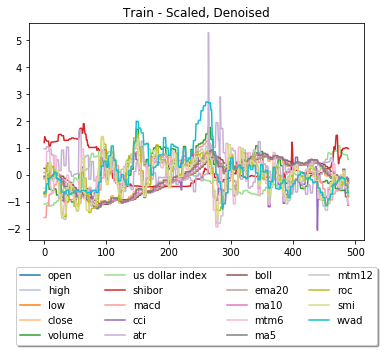

In [116]:
# Train, Scaled & Denoised
# plt.plot(X_train_scaled_denoised_df.values);
f, ax = plt.subplots()
plt.title("Train - Scaled, Denoised")
colormap = plt.cm.tab20
colors = [colormap(i) for i in np.linspace(0, 1,20)]
ax.set_prop_cycle('color', colors)
ax.plot(X_train_scaled_denoised_df.values)
plt.legend(X_train.columns,loc='upper center',bbox_to_anchor=(0.5, -0.1),
           ncol=4,fancybox=True,shadow=True)
plt.show()

In [117]:
# Test inverse_transform to reverse scaling
#plt.plot(scaler.inverse_transform(X_train_scaled_df));